# 2. Training Simple Machine Learning Algorithms for Classification

In [1]:
import numpy as np
class Perceptron(object):
    '''Perceptron classifier.
    
    Parameters
    -----------
    ete : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over training data.
    rand_state : int
      Random number generator seed for replication of random
      weight initialization.
      
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
      
    '''
    
    def __init__(self, eta=0.1, n_iter=50, rand_state=2020):
        self.eta = eta
        self.n_iter = n_iter
        self.rand_state = rand_state
    
    def fit(self, X, y):
        '''Fit training data.
        
        Parameters
        -----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors of number of examples and features
          are n_examples and n_features, respectively.
        y : {array-like}, shape = [n_examples]
          Target values.
            
        Returns
        --------
        self : object
        
        '''
        rgen = np.random.RandomState(self.rand_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, yi in zip(X, y):
                yi_bar = self.predict(xi)
                update = self.eta*(yi - yi_bar)
                self.w_[0] += update 
                self.w_[1:] += update*xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        '''net input'''
        return np.dot(X, self.w_[1:]) + 1*self.w_[0]
    
    def predict(self, X):
        '''label after unit step'''
        z = self.net_input(X)
        return np.where(z >= 0.0, 1, -1)
    

In [2]:
'''
Import iris data from UCU ML rep 
'''
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris','iris.data')
df = pd.read_csv(s, header=None, encoding='utf-8')
df.head()          

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
import numpy as np
class AdalineGradientDescent(object):
    '''Adaline classifier.
    
    Parameters
    -----------
    
    eta : float
      Learning rate (between 0.0 and 1.0).
    n_iter : int
      Passes over the training dataset.
    rand_state: int
      Random number generator seed for replication of random
      weight initialization.
    
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      SES cost funtion value in each epoch
    
    '''
    
    def __init__(self, eta=0.01, n_iter=50, rand_state=2020):
        self.eta = eta
        self.n_iter = n_iter
        self.rand_state = rand_state
        
    def fit(self, X, y):
        '''Fit training data.
        
        Parameters
        -----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors of number of examples and features
          are n_examples and n_features, respectively.
        y : {array-like}, shape = [n_examples]
          Target values.
            
        Returns
        --------
        self : object
        
        '''
        rgen = np.random.RandomState(self.rand_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = 0.5*(errors**2).sum()
            self.cost_.append(cost)
        return self
            
            
    def net_input(self, X):
        '''net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        '''Compute linear activation'''
        return X
    
    def predict(self, X):
        '''label after unit step'''
        z = self.activation(self.net_input(X))
        return np.where(z >= 0.0, 1, -1)

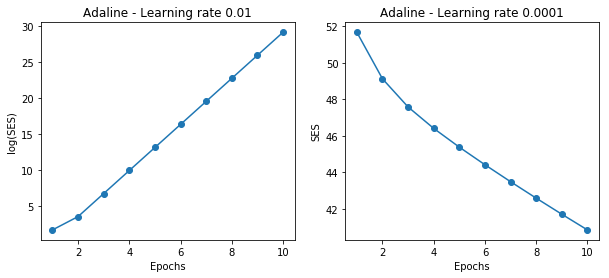

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGradientDescent(eta=0.01, n_iter=10).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SES)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGradientDescent(eta=0.0001, n_iter=10).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('SES')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

#### Standardization 

In [7]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

Text(0.5, 1.0, 'Adaline std data - Learning rate 0.0001')

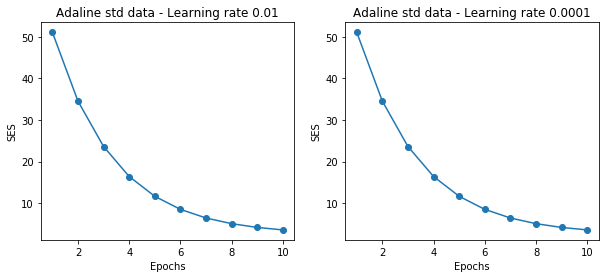

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1_gdStd = AdalineGradientDescent(eta=0.01, n_iter=10).fit(X_std,y)
ax[0].plot(range(1, len(ada1_gdStd.cost_) + 1), ada1_gdStd.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('SES')
ax[0].set_title('Adaline std data - Learning rate 0.01')

ada2_gdStd = AdalineGradientDescent(eta=0.01, n_iter=10).fit(X_std, y)
ax[1].plot(range(1, len(ada2_gdStd.cost_) + 1), ada2_gdStd.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('SES')
ax[1].set_title('Adaline std data - Learning rate 0.0001')

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colors[idx],
                     marker=markers[idx],
                     label=cl,
                     edgecolor='black')

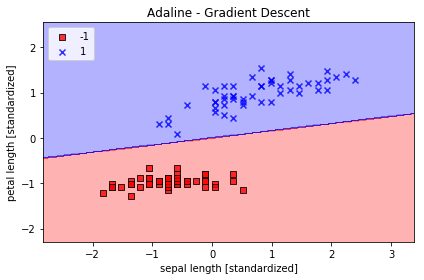

In [10]:
plot_decision_regions(X_std, y, classifier=ada1_gdStd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Stochastic Gradient Descent  (SGD)

In [11]:
import numpy as np
class AdalineStochasticGradientDescent(object):
    '''Adaline classifier.
    
    Parameters
    -----------
    
    eta : float
      Learning rate (between 0.0 and 1.0).
    n_iter : int
      Passes over the training dataset.
    rand_state: int
      Random number generator seed for replication of random
      weight initialization.
    
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent
      cycles.
    
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      SES cost funtion value in each epoch
    
    '''
    
    def __init__(self, eta=0.01, n_iter=50, rand_state=2020, shuffle=True, adaptive=True):
        self.eta = eta
        self.n_iter = n_iter
        self.rand_state = rand_state
        self.w_intialized = False
        self.shuffle = shuffle
        self.adaptive = adaptive
        
    def fit(self, X, y):
        '''Fit training data.
        
        Parameters
        -----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors of number of examples and features
          are n_examples and n_features, respectively.
        y : {array-like}, shape = [n_examples]
          Target values.
            
        Returns
        --------
        self : object
        
        '''
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
                cost = []
                for xi, target in zip(X,y):
                    cost.append(self._update_weights(xi, target))
                avg_cost = sum(cost)/len(y)
                self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        '''Fit training data without reinitializing the weights'''
        if not self.w_intialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape(0) > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        '''Shuffle training data'''
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        '''Initialize weights to small random numbers'''
        self.rgen = np.random.RandomState(self.rand_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_intialized = True
        
    def _update_weights(self, xi, target):
        '''Apply Adaline learning rule to update the weights'''
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta*error
        cost = 0.5*error**2
        return cost
    
    def net_input(self, X):
        '''net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        '''Compute linear activation'''
        return X
    
    def predict(self, X):
        '''label after unit step'''
        z = self.activation(self.net_input(X))
        return np.where(z >= 0.0, 1, -1)

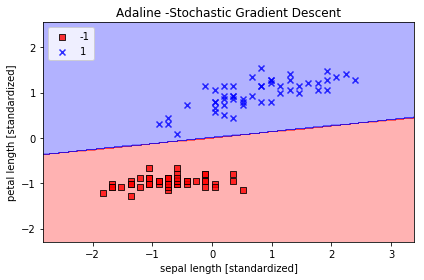

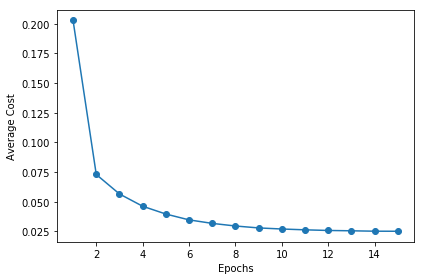

In [12]:
ada_sgd = AdalineStochasticGradientDescent(eta=0.01, n_iter=15, rand_state=2020).fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline -Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

#### Adaptive Learning Rate

In [13]:
import numpy as np
class AdalineAdaptiveSGD(object):
    '''Adaline classifier.
    
    Parameters
    -----------
    
    eta : float
      Adaptive changes with respect to number of iterations.
    n_iter : int
      Passes over the training dataset.
    rand_state: int
      Random number generator seed for replication of random
      weight initialization.
    
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent
      cycles.
    
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      SES cost funtion value in each epoch
    
    '''
    
    def __init__(self, eta=0.01, n_iter=50, rand_state=2020, shuffle=True, adaptive=True):
        self.eta = eta
        self.n_iter = n_iter
        self.rand_state = rand_state
        self.w_intialized = False
        self.shuffle = shuffle
        self.adaptive = adaptive
        
    def fit(self, X, y):
        '''Fit training data.
        
        Parameters
        -----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors of number of examples and features
          are n_examples and n_features, respectively.
        y : {array-like}, shape = [n_examples]
          Target values.
            
        Returns
        --------
        self : object
        
        '''
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.adaptive:
                #self.eta = 1/(100+i)
                '''c1 = 1, c2 = 100,  also why didn't some inverse 
                logarithmic function give good performance ??'''
                self.eta = 1/(1+np.exp(i))

            if self.shuffle:
                X, y = self._shuffle(X, y)
                cost = []
                for xi, target in zip(X,y):
                    cost.append(self._update_weights(xi, target))
                avg_cost = sum(cost)/len(y)
                self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        '''Fit training data without reinitializing the weights'''
        if not self.w_intialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape(0) > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        '''Shuffle training data'''
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        '''Initialize weights to small random numbers'''
        self.rgen = np.random.RandomState(self.rand_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_intialized = True
        
    def _update_weights(self, xi, target):
        '''Apply Adaline learning rule to update the weights'''
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta*error
        cost = 0.5*error**2
        return cost
    
    def net_input(self, X):
        '''net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        '''Compute linear activation'''
        return X
    
    def predict(self, X):
        '''label after unit step'''
        z = self.activation(self.net_input(X))
        return np.where(z >= 0.0, 1, -1)
    

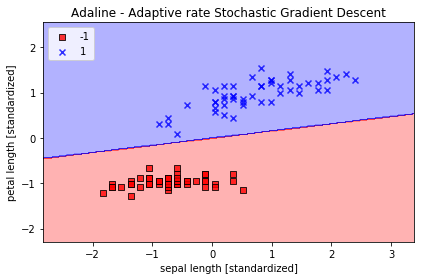

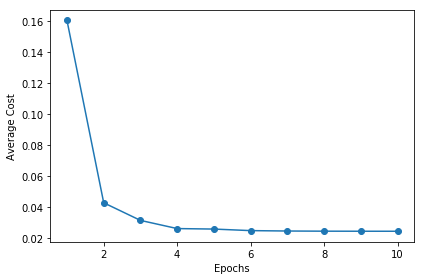

In [14]:
adap_sgd = AdalineAdaptiveSGD(eta=0.01, n_iter=10, rand_state=2020, adaptive=True).fit(X_std, y)
plot_decision_regions(X_std, y, classifier=adap_sgd)
plt.title('Adaline - Adaptive rate Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(adap_sgd.cost_) + 1), adap_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

## 3. A Tour of Machine Learning Classifiers Using scikit-learn

In [15]:
from sklearn import datasets
import numpy as np

In [16]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    random_state is used for the results reproducibility 
    stratify : makes sure that same proportion of class labels in training and test subsets as the input dataset 
### Is stratisfying before the split a good thing ? ?

In [18]:
print('Labels counts in y:' , np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [19]:
'''Feature Scaling'''
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train) # estimating the mean and standard deviation for each feature of the training data
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)

In [20]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state=1)
ppn.fit(X_train_std, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 11


In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.756


In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,                          
                      resolution=0.02):    
    # setup marker generator and color map    
    markers = ('s', 'x', 'o', '^', 'v')    
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')    
    cmap = ListedColormap(colors[:len(np.unique(y))])        
    # plot the decision surface    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),                           
                           np.arange(x2_min, x2_max, resolution))    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)    
    Z = Z.reshape(xx1.shape)    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)    
    plt.xlim(xx1.min(), xx1.max())    
    plt.ylim(xx2.min(), xx2.max())        
    for idx, cl in enumerate(np.unique(y)):        
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],                    
                    alpha=0.8, c=colors[idx],                    
                    marker=markers[idx], label=cl,                    
                    edgecolor='black')        
        # highlight test examples    
        if test_idx:        
            # plot all examples        
            X_test, y_test = X[test_idx, :], y[test_idx]                
            plt.scatter(X_test[:, 0], X_test[:, 1],                    
                        c='', edgecolor='black', alpha=1.0,                   
                        linewidth=1, marker='o',                    
                        s=100, label='test set')

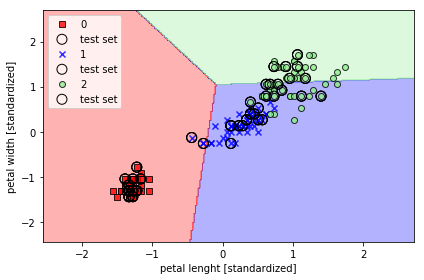

In [24]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Modeling class probabilities via logistic regression 

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    '''logistic sigmoid funtion'''
    return 1.0/(1.0 + np.exp(-z))


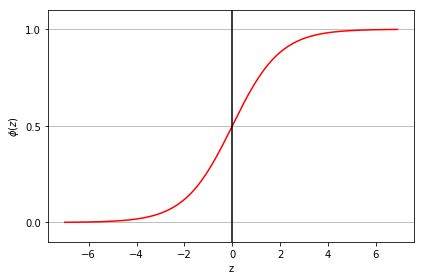

In [26]:
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z, color='r')
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.axvline(0.0, color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [27]:
def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log(1-sigmoid(z))

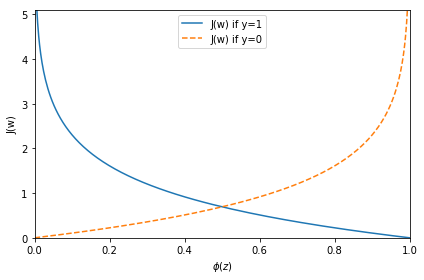

In [28]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, label='J(w) if y=0', linestyle='--')
plt.ylim(0.0, 5.1)
plt.xlim(0, 1)
plt.xlabel('$\phi(z)$')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [29]:
import numpy as np
class LogisticRegressionGradientDescent(object):
    '''Logistic regression classifier using gradient descent.
    
    Parameters
    -----------
    
    eta : float
      Learning rate (between 0.0 and 1.0).
    n_iter : int
      Passes over the training dataset.
    rand_state: int
      Random number generator seed for replication of random
      weight initialization.
    
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      SES cost funtion value in each epoch
    
    '''
    
    def __init__(self, eta=0.05, n_iter=100, rand_state=2020):
        self.eta = eta
        self.n_iter = n_iter
        self.rand_state = rand_state
        
    def fit(self, X, y):
        '''Fit training data.
        
        Parameters
        -----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors of number of examples and features
          are n_examples and n_features, respectively.
        y : {array-like}, shape = [n_examples]
          Target values.
            
        Returns
        --------
        self : object
        
        '''
        rgen = np.random.RandomState(self.rand_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
        return self
            
            
    def net_input(self, X):
        '''net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        '''Compute logistic sigmoid function'''
        return 1.0/(1.0 + np.exp(-np.clip(z, -250, 250)))  # what is thiis ??
    
    def predict(self, X):
        '''label after unit step'''
        return np.where(self.net_input(X) >= 0.0, 1, 0)

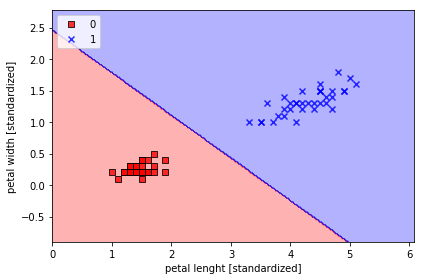

In [30]:
X_train_01_subset = X_train[(y_train==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train==0)|(y_train==1)] # what is this doing ??

lrgd = LogisticRegressionGradientDescent(eta=0.05, n_iter=1000, rand_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

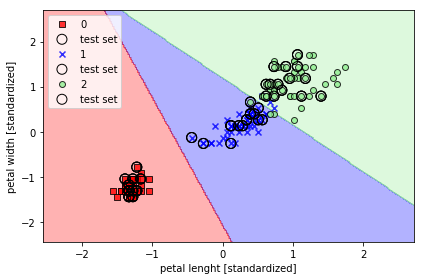

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [33]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1) # law of probability

array([1., 1., 1.])

In [34]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [35]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [36]:
lr.predict(X_test_std[0, :].reshape(1,-1)) # Converting a single row entry into 2-D data array

array([2])

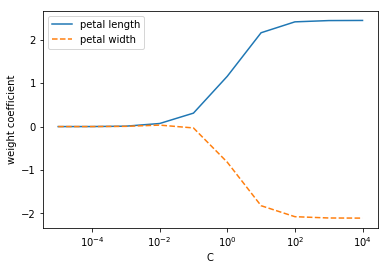

In [37]:
weights, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### Support Vector Machines (SVM)

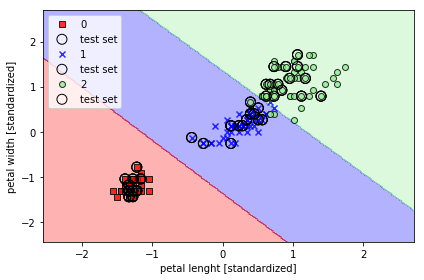

In [38]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [39]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


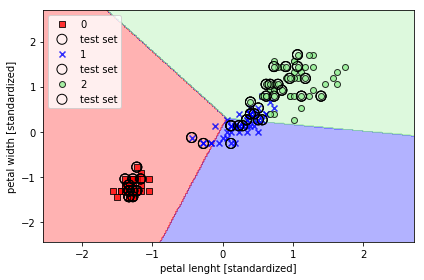

In [40]:
ppn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


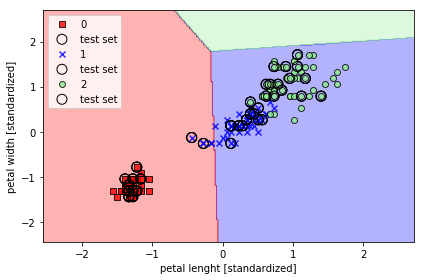

In [41]:
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


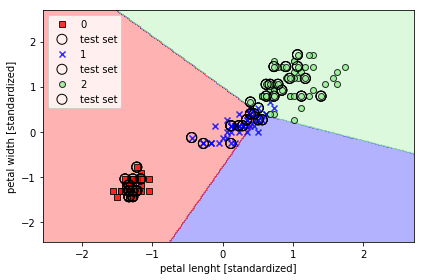

In [42]:
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [43]:
### check their accuracies 

#### Solving nonlinear problems using SVM

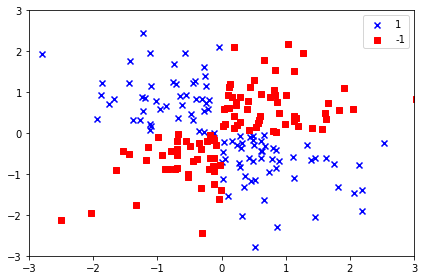

In [44]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

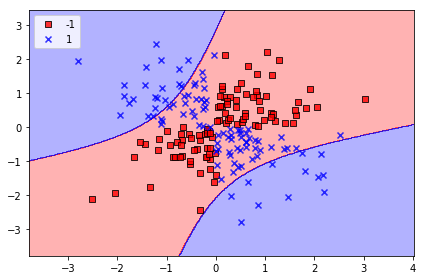

In [45]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.01, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

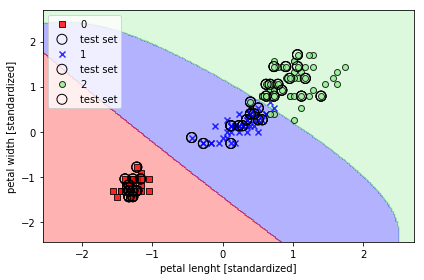

In [46]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

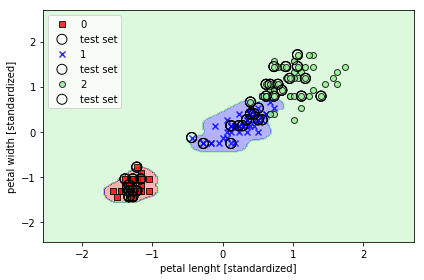

In [47]:
svm = SVC(kernel='rbf', random_state=1, gamma=50, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### $\gamma = \frac{1}{2\sigma^2}$, by increasing $\gamma$ increases the influence of the training examples, hence it means that it is important for not overfitting.

## Decision Tree Learning

In [48]:
a = np.arange(0.01, 1.00, 0.02)

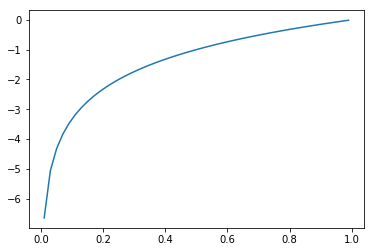

In [49]:
plt.plot(a, np.log2(a))

##### entropy and gini are maximum when the dataset is devided into two class in binary classification equally 

Text(0, 0.5, 'impurity index')

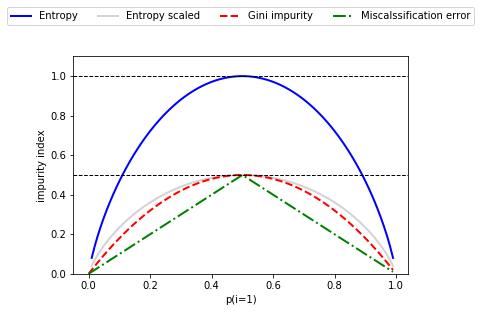

In [50]:
def gini(p):
    return (p)*(1-(p)) + (1-p)*(1 - (1-p))
def entropy(p):
    return (-p*np.log2(p) - (1-p)*np.log2(1-p))
def classificationError(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [classificationError(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy scaled', 'Gini impurity', 'Miscalssification error'],
                         ['-', '-', '--', '-.'],
                         ['b', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,  linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')

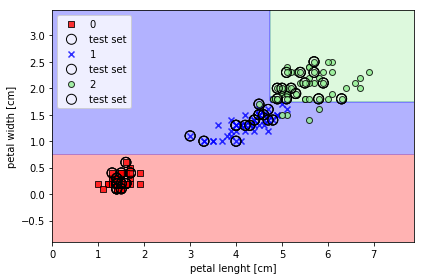

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dtree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combine = np.hstack ((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=dtree, test_idx=range(105, 150))
plt.xlabel('petal lenght [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

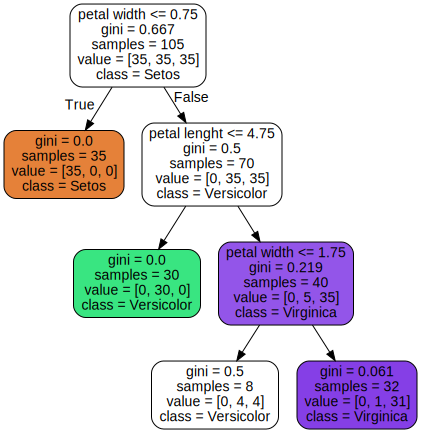

In [52]:
from pydotplus import graph_from_dot_data
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display
tree_graph = Source(tree.export_graphviz(dtree, filled=True, rounded=True, class_names=['Setos',
                                                                              'Versicolor', 'Virginica'],
                               feature_names=['petal lenght', 'petal width'],
                               out_file=None))

display(SVG(tree_graph.pipe(format='svg')))

#### <font color='red'> check </font> https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084 for interactive decision tree in jupyter notebooks.

#### Random Forest

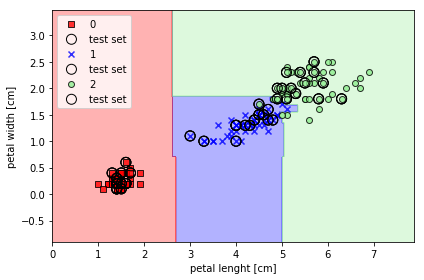

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal lenght [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### kNN

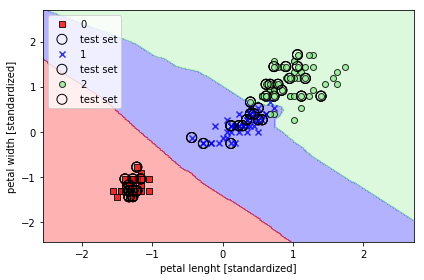

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 4. Building Good Training Datasets - Data Preprocessing 

In [79]:
import pandas as pd
from io import StringIO
csv_data = \
'''a, b, c, d
1.0, 2.0, 3.0, 4.0
5.0, 6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,a,b,c,d
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [80]:
df.isnull().sum()

a     0
 b    0
 c    1
 d    1
dtype: int64

#### ... it is recommended to use NumPy arrays when possible ...

In [81]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [82]:
dfa = df.values
print(dfa) # get the numpy array from a dataframe

[[ 1.  2.  3.  4.]
 [ 5.  6. nan  8.]
 [10. 11. 12. nan]]


In [83]:
df.dropna(axis=0)

,a,b,c,d
0,1.0,2.0,3.0,4.0


In [62]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [84]:
df.dropna(how='all') # "Drop rows where we have all are NAN", 

,a,b,c,d
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [85]:
df.dropna(thresh=4) # drop rows which have less than 4 values

,a,b,c,d
0,1.0,2.0,3.0,4.0


In [ ]:
dff = pd.DataFrame({"A":[]})

In [ ]:
dfa.dropna(subset=[2]) # drop rows corresponding to the NAN in specific column

In [74]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [76]:
df.dropna(subset=['name', 'born'])


,name,toy,born
1,Batman,Batmobile,1940-04-25


In [ ]:
from sklearn.im